In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf
import seaborn as sb
import risk_module as rm

In [ ]:
import scipy.stats
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.stats import skew

Now we will get last 15 years stock data for some companies from yfinance

In [ ]:
company = ['RELIANCE.NS','HDFCBANK.NS','INFY.NS','TCS.NS','ICICIBANK.NS','HINDUNILVR.NS','BHARTIARTL.NS','ASIANPAINT.NS','AXISBANK.NS','MARUTI.NS']

#Fetching monthly data for last 15 years for these companies
data = yf.download(company, start = '2014-6-26', end = '2024-6-26')

#Selecting close prices from the downloaded data to calculate returns
price_data = data['Adj Close']

#Calculating percentage change (returns) of the closing prices
returns = price_data[company].pct_change()

#Dropping rows with NaN values
returns.dropna(inplace = True)

#Storing the returns in a pandas dataframe
rets = pd.DataFrame(returns)

[*********************100%%**********************]  10 of 10 completed


In [ ]:
rets

Ticker,RELIANCE.NS,HDFCBANK.NS,INFY.NS,TCS.NS,ICICIBANK.NS,HINDUNILVR.NS,BHARTIARTL.NS,ASIANPAINT.NS,AXISBANK.NS,MARUTI.NS
Date,,,,,,,,,,
2014-06-27,0.000198,0.004678,0.012851,0.039824,-0.012833,-0.003637,-0.019944,-0.000171,-0.009546,-0.012948
2014-06-30,0.003260,0.006555,0.009974,0.010773,0.024194,0.006408,0.015677,0.015906,0.005054,-0.006253
2014-07-01,-0.007288,0.002130,-0.010597,-0.014286,0.014032,0.013702,-0.004155,-0.017088,0.000626,0.059217
2014-07-02,0.010169,0.020163,-0.001785,0.004538,0.009701,0.003657,0.007899,0.000342,0.003542,0.022505
2014-07-03,-0.011540,-0.003691,-0.001431,0.006787,0.001412,-0.011170,-0.003549,-0.004023,-0.000597,-0.004561
...,...,...,...,...,...,...,...,...,...,...
2024-06-19,-0.015108,0.031129,0.008777,-0.003512,0.019237,-0.011765,-0.025204,-0.009183,0.029155,-0.025384
2024-06-20,0.010318,0.006937,0.002680,-0.003801,0.010791,0.010256,-0.008044,0.008230,0.010476,-0.007564
2024-06-21,-0.013232,-0.002157,0.011416,0.006205,0.001599,-0.016477,0.025269,-0.008455,-0.001654,0.004280


In [ ]:
price_data

Ticker,ASIANPAINT.NS,AXISBANK.NS,BHARTIARTL.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2014-06-26,542.587158,373.411865,288.665985,375.752319,527.753784,234.109940,312.490417,2273.011719,436.273956,939.331238
2014-06-27,542.494385,369.847412,282.908844,377.509918,525.834290,231.105652,316.506378,2243.580811,436.360199,976.739563
2014-06-30,551.123291,371.716766,287.343933,379.984406,529.203918,236.696991,319.663147,2229.551270,437.782928,987.261536
2014-07-01,541.705811,371.949280,286.149933,380.793793,536.455139,240.018402,316.275665,2361.577637,434.592499,973.157166
2014-07-02,541.891174,373.266541,288.410095,388.471680,538.417114,242.346725,315.711060,2414.726074,439.011719,977.573669
...,...,...,...,...,...,...,...,...,...,...
2024-06-19,2891.699951,1226.650024,1392.349976,1657.849976,2457.000000,1144.449951,1511.349976,12242.099609,2917.300049,3801.699951
2024-06-20,2915.500000,1239.500000,1381.150024,1669.349976,2482.199951,1156.800049,1515.400024,12149.500000,2947.399902,3787.250000
2024-06-21,2890.850098,1237.449951,1416.050049,1665.750000,2441.300049,1158.650024,1532.699951,12201.500000,2908.399902,3810.750000


In [ ]:
#covariance between assets
cov_matrix = rets.cov()
cov_matrix.head()

Ticker,RELIANCE.NS,HDFCBANK.NS,INFY.NS,TCS.NS,ICICIBANK.NS,HINDUNILVR.NS,BHARTIARTL.NS,ASIANPAINT.NS,AXISBANK.NS,MARUTI.NS
Ticker,,,,,,,,,,
RELIANCE.NS,0.000307,0.000100,0.000074,0.000067,0.000130,0.000064,0.000090,0.000088,0.000134,0.000113
HDFCBANK.NS,0.000100,0.000203,0.000063,0.000050,0.000147,0.000053,0.000076,0.000072,0.000144,0.000101
INFY.NS,0.000074,0.000063,0.000280,0.000140,0.000077,0.000054,0.000059,0.000056,0.000076,0.000057
TCS.NS,0.000067,0.000050,0.000140,0.000223,0.000058,0.000049,0.000046,0.000050,0.000061,0.000057
ICICIBANK.NS,0.000130,0.000147,0.000077,0.000058,0.000401,0.000062,0.000108,0.000093,0.000286,0.000149


In [ ]:
#calculating annualized returns using the function from the risk module
ann_rets = pd.Series(rm.annualized_return(rets))
ann_rets

0    0.214404
1    0.167945
2    0.177566
3    0.155046
4    0.181957
5    0.169358
6    0.176765
7    0.185485
8    0.133670
9    0.186917
dtype: float64

<Axes: xlabel='Ticker'>

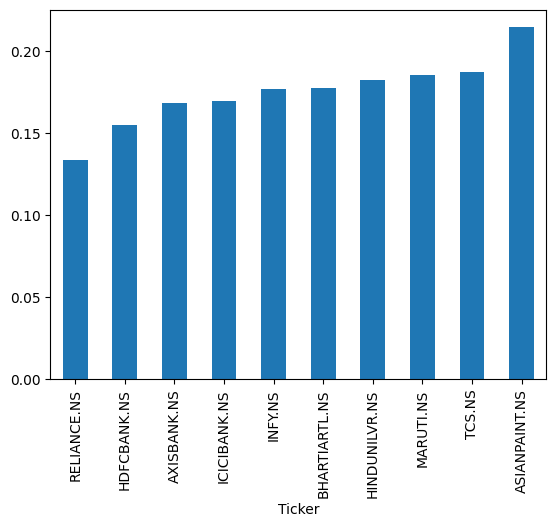

In [ ]:
#Plotting Annual returns of stocks
column_name = price_data.columns
ann_rets.index = column_name
ann_rets.sort_values().plot.bar()

In [ ]:
#Calculating weights for portfolio with maximum sharpe ratio
weights = rm.msr(0.03, ann_rets, cov_matrix)

r = rm.portfolio_return(weights, ann_rets) #returns of optimized portfolio
vol = rm.portfolio_vol(weights, cov_matrix) #volatility of optimized portfolio

In [ ]:
r

0.18009031283099936

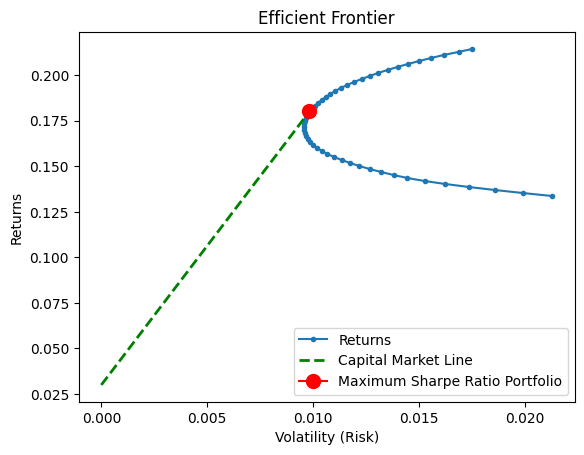

In [ ]:
riskfree_rate = 0.03

# Plotting the Efficient Frontier
ax = rm.plot_ef(50, ann_rets, cov_matrix, riskfree_rate=riskfree_rate)

# Maximum Sharpe Ratio portfolio
w_msr = rm.msr(riskfree_rate, ann_rets, cov_matrix)
r_msr = rm.portfolio_return(w_msr, ann_rets)
vol_msr = rm.portfolio_vol(w_msr, cov_matrix)

# Plotting the CML
cml_x = [0, vol_msr]
cml_y = [riskfree_rate, r_msr]
plt.plot(cml_x, cml_y, color='green', linestyle='dashed', linewidth=2, markersize=10, label='Capital Market Line')

# Plotting the Maximum Sharpe Portfolio
plt.plot(vol_msr, r_msr, color='red', marker='o', markersize=10, label='Maximum Sharpe Ratio Portfolio')

plt.title("Efficient Frontier")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Returns")
plt.legend()
plt.show()

In [ ]:
w_msr

array([1.64712293e-01, 1.31397284e-01, 1.21046801e-01, 9.81031638e-02,
       0.00000000e+00, 1.95931194e-01, 9.53929159e-02, 1.35456733e-01,
       4.77502966e-15, 5.79596166e-02])

In [ ]:
sharpe = (r-0.03)/vol
print(f"The return of the portfolio is {r*100}%")
print(f"The volatility of the portfolio is {vol*100}%")
print(f"The Sharpe Ratio of the portfolio is {sharpe}")

The return of the portfolio is 18.009031283099937%
The volatility of the portfolio is 0.9835069594940994%
The Sharpe Ratio of the portfolio is 15.260727072862144


# CPPI Strategy

In [ ]:
#Taking the same 10 assets as risky assets and using them as risky assets in CPPI
df = rm.run_cppi(rets)

<Axes: xlabel='Date'>

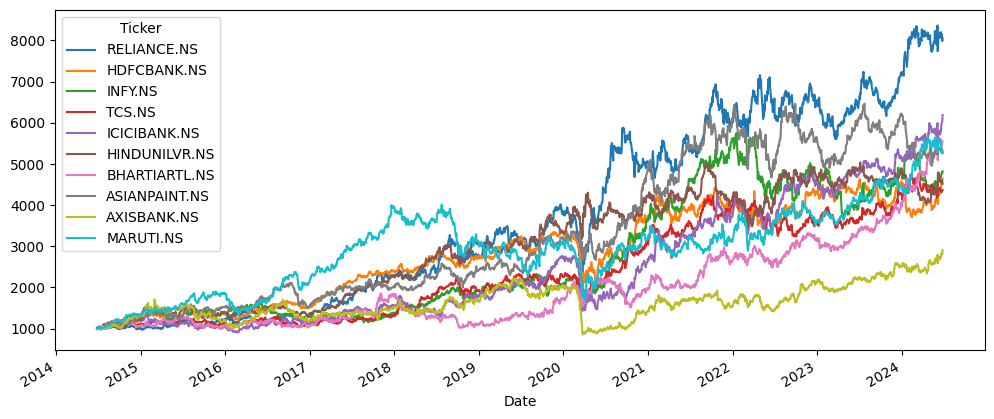

In [ ]:
# plotting the wealth index after running cppi
df["Wealth"].plot(figsize=(12,5))

<Axes: xlabel='Date'>

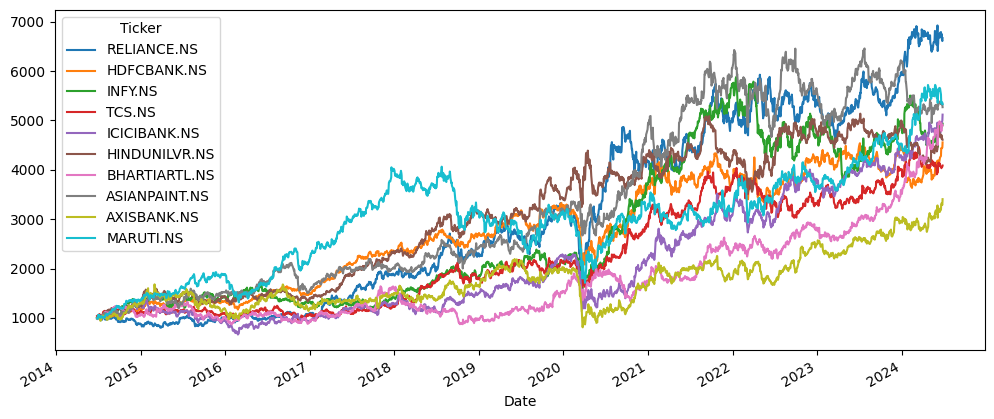

In [ ]:
#plotting returns if all the initial amount was placed in the risky asset
df["Risky Wealth"].plot(figsize = (12,5))

In [ ]:
#calculating the return series for the portfolio where cppi was used
cppi_rets = df["Wealth"].pct_change().dropna()

In [ ]:
#performance of the portfolio
rm.summary_stats(cppi_rets)

,Ticker,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Sharpe Ratio
0,RELIANCE.NS,0.238131,0.059036,0.375026,9.320320,0.022999,3.525487
1,HDFCBANK.NS,0.170048,0.049096,-0.059776,10.609754,0.020647,2.852512
2,INFY.NS,0.173841,0.057696,-0.252705,8.698682,0.025876,2.493102
3,TCS.NS,0.160123,0.050263,-0.052155,4.169993,0.023039,2.588831
4,ICICIBANK.NS,0.206123,0.065957,0.157763,9.465009,0.027041,2.670269
5,HINDUNILVR.NS,0.167201,0.049269,0.832599,7.928987,0.017710,2.784742
6,BHARTIARTL.NS,0.193068,0.062622,0.419214,3.952036,0.026305,2.603988
7,ASIANPAINT.NS,0.185629,0.055230,-0.048407,5.069402,0.024970,2.817817
8,AXISBANK.NS,0.116012,0.066186,-0.977589,17.481707,0.030182,1.299548
9,MARUTI.NS,0.186282,0.060403,0.103622,9.879257,0.024908,2.587333


In [ ]:
return_df = rm.summary_stats(rets)

In [ ]:
return_df

,Ticker,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Sharpe Ratio
0,RELIANCE.NS,0.214404,0.060721,0.332834,8.363071,0.024311,3.036918
1,HDFCBANK.NS,0.167945,0.049341,-0.053449,10.362824,0.020806,2.795744
2,INFY.NS,0.177566,0.057936,-0.237704,8.570250,0.025947,2.547068
3,TCS.NS,0.155046,0.051736,-0.056536,3.855856,0.023858,2.416983
4,ICICIBANK.NS,0.181957,0.069371,0.194251,7.928982,0.028958,2.190489
5,HINDUNILVR.NS,0.169358,0.049408,0.828792,7.828916,0.017801,2.820547
6,BHARTIARTL.NS,0.176765,0.065813,0.481163,3.749098,0.027450,2.230019
7,ASIANPAINT.NS,0.185485,0.055580,-0.040063,4.926984,0.025140,2.797530
8,AXISBANK.NS,0.133670,0.073808,-0.427438,18.537915,0.030147,1.404593
9,MARUTI.NS,0.186917,0.060639,0.116982,9.735052,0.024989,2.587709
